＃線形補間　課題1
＃＃鈴木大志

In [7]:
println(readall("lin_interp2.jl"))

immutable lin_interp2
    grid::Array
    vals::Array
end

function Base.call(points::lin_interp2, x::Real)
    i = searchsortedlast(grid, x)
    if i == 0 || i == length(grid)
        return 0
    end
    x_i = grid[i]
    x_j = grid[i + 1]
    y_i = vals[i]
    y_j = vals[i + 1]
        
    y = y_i + (y_j - y_i) * ((x - x_i) / (x_j - x_i))
    return y
end

function Base.call{T<:Real}(points::lin_interp2, x::AbstractVector{T})
    n = length(x)
    out = Array(Float64, n)
    for t in 1:n
        out[t] = points(x[t])
    end
    return out
end


In [3]:
include("lin_interp2.jl")

call (generic function with 1791 methods)

＃sin（x）の線形補間と残差

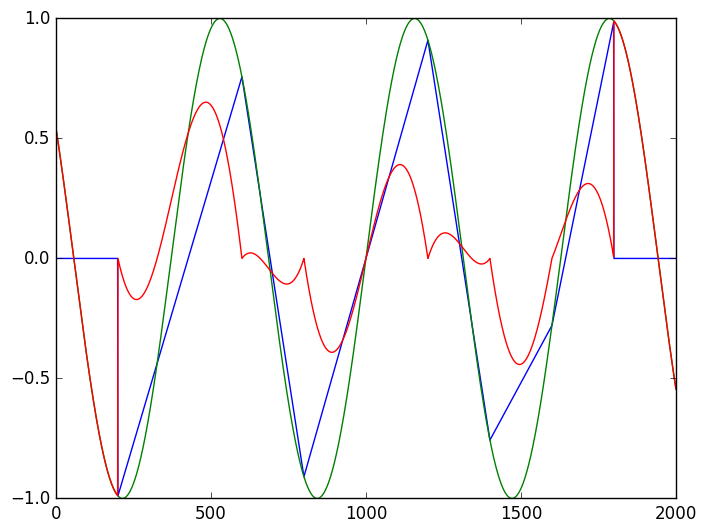

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000019DDFC18>

In [6]:
using PyPlot
grid = [-8, -4, -2, 0, 2, 4, 6, 8]
vals = sin(grid)
points = lin_interp2(grid, vals)
x = [-10:0.01:10]
residual(x) = sin(x) - points(x)
plot(points(x))
plot(sin(x))
plot(residual(x))